In [1]:
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

# Data Visualization

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [3]:
c_df = pd.read_csv("dataset/c-breast-cancer.csv")
n_df = pd.read_csv("dataset/n-breast-cancer.csv")
i_dir = 'dataset/i-breast-cancer/'
i_label = ["benign", "malignant", "normal"]

## Classification dataset visualization

In [4]:
c_df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'


In [5]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [6]:
c_df.isnull().sum()

age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiate      0
class          0
dtype: int64

In [7]:
c_df.describe()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
count,286,286,286,286,278,286,286,285,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,50-59',premeno',30-34',0-2',no',2',left',left_low',no',no-recurrence-events'
freq,96,150,60,213,222,130,152,110,218,201


## Numerical Dataset visualization

In [8]:
n_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
n_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
n_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

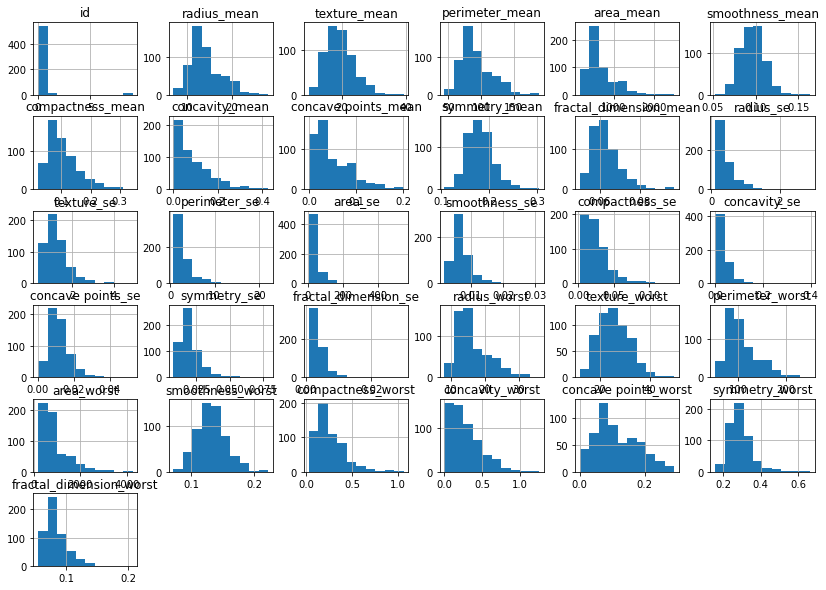

In [12]:
n_df.hist(figsize=(14,10))

In [13]:
n_df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


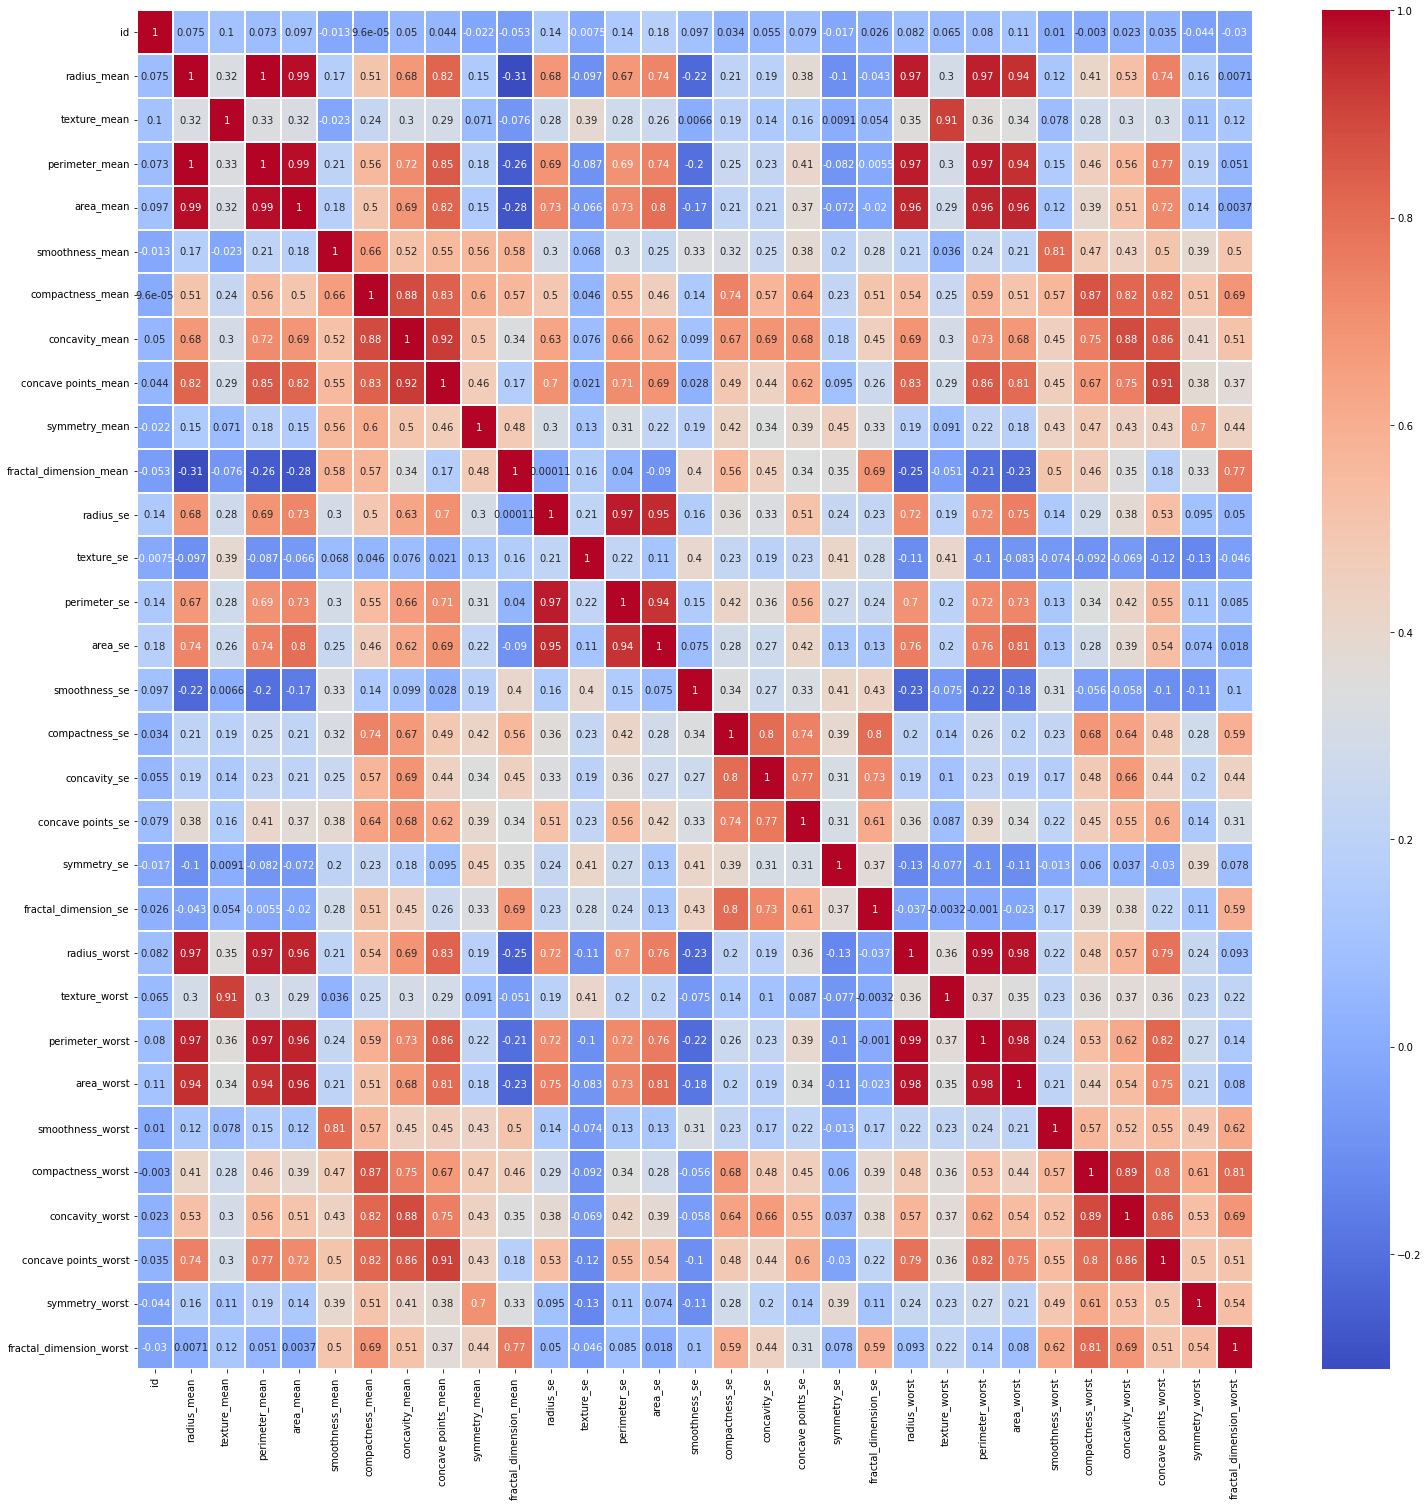

In [14]:
plt.figure(figsize=(25, 25))
sns.heatmap(n_df.corr(), annot = True, linewidths= 0.3, cmap="coolwarm")
plt.show()

## Image dataset visualization 

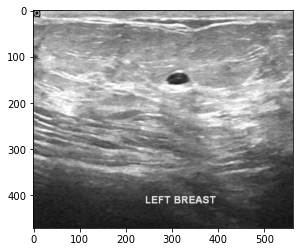

In [15]:
for category in i_label:
    path = os.path.join(i_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

Class 'benign': 245 images
Class 'malignant': 100 images
Class 'normal': 50 images


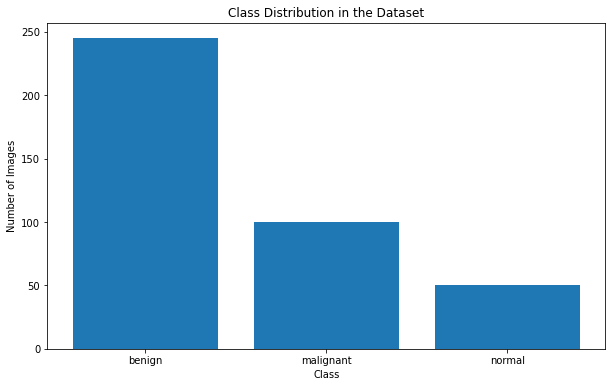

In [16]:
class_counts = {}

for category in i_label:
    category_path = os.path.join(i_dir, category)
    if os.path.exists(category_path):
        class_counts[category] = len(os.listdir(category_path))
    else:
        class_counts[category] = 0

for category, count in class_counts.items():
    print(f"Class '{category}': {count} images")

# Plotting the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in the Dataset')
plt.show()


In [17]:
def load_image(folder):
    img_arr = []
    img_dir = []
    labels = []
    for label_name in os.listdir(folder):
        label_folder = os.path.join(folder, label_name)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                img_dir.append(img_path)
                img_arr.append(img)
                labels.append(label_name)
    return img_dir, img_arr, labels

In [18]:
img_path, img_arr, label = load_image(i_dir)

In [19]:
i_df = pd.DataFrame({'img_path': img_path, 'img_arr': img_arr, 'label': label})

In [20]:
i_df.head()

,img_path,img_arr,label
0,dataset/i-breast-cancerr/benign\benign (1).png,"[[[183, 183, 183], [101, 101, 101], [188, 188,...",benign
1,dataset/i-breast-cancerr/benign\benign (1)_mas...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",benign
2,dataset/i-breast-cancerr/benign\benign (10).png,"[[[6, 6, 6], [196, 196, 196], [216, 216, 216],...",benign
3,dataset/i-breast-cancerr/benign\benign (10)_ma...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",benign
4,dataset/i-breast-cancerr/benign\benign (100).png,"[[[159, 159, 159], [195, 195, 195], [204, 204,...",benign


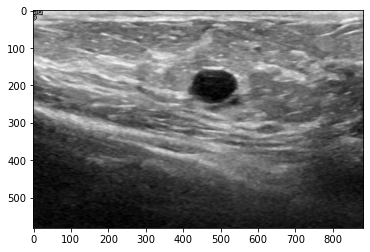

In [21]:
img = cv2.imread(i_df['img_path'][15])
plt.imshow(img)

# Split Data

## Split categorical data

In [22]:
c_x = c_df.drop("class", axis = 1)
c_y = c_df["class"]

In [23]:
c_x.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no'
1,50-59',ge40',15-19',0-2',no',1',right',central',no'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no'


In [24]:
c_y.head()

0       recurrence-events'
1    no-recurrence-events'
2       recurrence-events'
3    no-recurrence-events'
4       recurrence-events'
Name: class, dtype: object

## Split numerical data

In [25]:
n_x = n_df.drop("diagnosis", axis = 1)
n_y = n_df["diagnosis"]

In [26]:
n_x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Stratified K-Fold Cross Split

In [27]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5  # Number of splits, adjust as needed
strat_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=98)
strat_kfold

StratifiedKFold(n_splits=5, random_state=98, shuffle=True)

## Categorical Data

### split based on tumor size (tumer-size)

In [28]:
c_df['tumer-size'].head

<bound method NDFrame.head of 0      15-19'
1      15-19'
2      35-39'
3      35-39'
4      30-34'
        ...  
281    30-34'
282    25-29'
283    30-34'
284    15-19'
285    40-44'
Name: tumer-size, Length: 286, dtype: object>

In [29]:
tumer_size_mapping = {
    "0-4'": 1,
    "5-9'": 2,
    "10-14'": 3,
    "15-19'": 4,
    "20-24'": 5,
    "25-29'": 6,
    "30-34'": 7,
    "35-39'": 8,
    "40-44'": 9,
    "45-49'": 10,
    "50-54'": 11,
    "55-59'": 12
}
c_tumer_size =c_df['tumer-size'].map(tumer_size_mapping)

In [30]:
c_tumer_size

0      4
1      4
2      8
3      8
4      7
      ..
281    7
282    6
283    7
284    4
285    9
Name: tumer-size, Length: 286, dtype: int64

<AxesSubplot:>

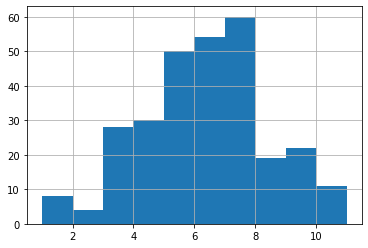

In [31]:
c_tumer_size.hist()

In [32]:
c_df["tumer_size_category"] = pd.cut(c_tumer_size,
                                    bins = [0, 2, 4, 6, 8, 10, 12],
                                    labels = [1,2,3,4,5,6])
c_df["tumer_size_category"].value_counts()

3    104
4     79
2     58
5     25
1     12
6      8
Name: tumer_size_category, dtype: int64

<AxesSubplot:>

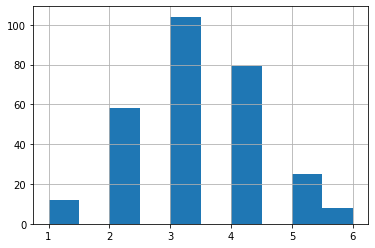

In [33]:
c_df["tumer_size_category"].hist()

In [34]:
c_df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,tumer_size_category
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events',2
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events',2
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events',4
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events',4
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events',4


### Stratified split from the tumer size category 

In [35]:
for fold, (train_index, test_index) in enumerate(strat_kfold.split(c_df, c_df["tumer_size_category"])):
  c_strat_train_set = c_df.loc[train_index]
  c_strat_test_set = c_df.loc[test_index]
    

In [36]:
# remove the category bcs we dont need it after
c_strat_test_set.drop("tumer_size_category", axis=1, inplace = True)
c_strat_train_set.drop("tumer_size_category", axis=1, inplace = True)

In [37]:
c_strat_test_set.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
5,50-59',premeno',25-29',3-5',no',2',right',left_up',yes',no-recurrence-events'
15,30-39',premeno',20-24',0-2',no',3',left',central',no',no-recurrence-events'
16,50-59',premeno',10-14',3-5',no',1',right',left_up',no',no-recurrence-events'
20,50-59',lt40',20-24',0-2',NaN,1',left',left_low',no',recurrence-events'


In [38]:
c_strat_train_set.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'
6,50-59',ge40',40-44',0-2',no',3',left',left_up',no',no-recurrence-events'


## Numerical Data

### split based on radius means (radius_mean)

In [39]:
n_df['radius_mean'].head

<bound method NDFrame.head of 0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64>

<AxesSubplot:>

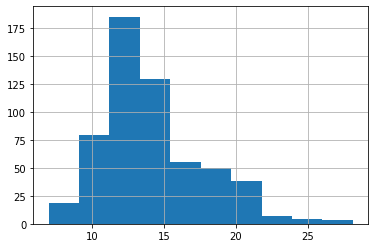

In [40]:
n_df['radius_mean'].hist()

In [41]:
n_df["radius_mean_category"] = pd.cut(n_df['radius_mean'],
                                    bins = [6, 14, 21, np.inf],
                                    labels = [1,2,3])
n_df["radius_mean_category"].value_counts()

1    337
2    210
3     22
Name: radius_mean_category, dtype: int64

<AxesSubplot:>

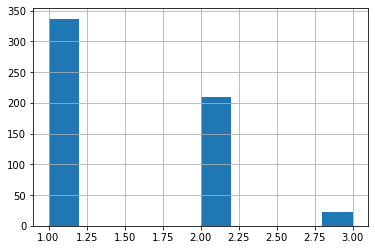

In [42]:
n_df["radius_mean_category"].hist()

In [43]:
n_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_mean_category
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


### Stratified split using radius means category

In [44]:
for fold, (train_index, test_index) in enumerate(strat_kfold.split(n_df, n_df["radius_mean_category"])):
  n_strat_train_set = n_df.loc[train_index]
  n_strat_test_set = n_df.loc[test_index]
    

In [45]:
# remove the category bcs we dont need it after
n_strat_test_set.drop("radius_mean_category", axis=1, inplace = True)
n_strat_train_set.drop("radius_mean_category", axis=1, inplace = True)

In [46]:
n_strat_test_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368
14,84667401,M,13.730,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,...,15.030,32.01,108.80,697.7,0.1651,0.77250,0.69430,0.22080,0.3596,0.14310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,919555,M,20.550,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,...,24.300,25.48,160.20,1809.0,0.1268,0.31350,0.44330,0.21480,0.3077,0.07569
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.1241,0.22640,0.13260,0.10480,0.2250,0.08321
565,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637


## Split image data 

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_i_train, x_i_test, y_i_train, y_i_test = train_test_split(i_df['img_arr'], i_df['label'], test_size = 0.2, random_state = 88)

In [49]:
x_i_train.head()

111    [[[126, 126, 126], [155, 155, 155], [132, 132,...
24     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
234    [[[197, 197, 197], [202, 202, 202], [197, 197,...
63     [[[178, 178, 178], [194, 194, 194], [210, 210,...
23     [[[202, 202, 202], [186, 186, 186], [195, 195,...
Name: img_arr, dtype: object

In [50]:
x_i_test.head()

171    [[[145, 145, 145], [234, 234, 234], [220, 220,...
287    [[[8, 8, 8], [1, 1, 1], [215, 215, 215], [224,...
145    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
192    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
97     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: img_arr, dtype: object

In [51]:
y_i_train.head()

111    benign
24     benign
234    benign
63     benign
23     benign
Name: label, dtype: object

<AxesSubplot:>

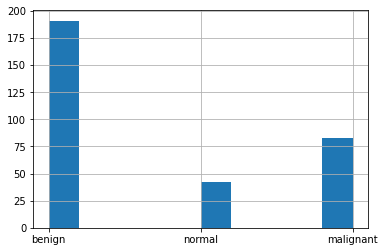

In [52]:
y_i_train.hist()

In [53]:
y_i_test.head()

171       benign
287    malignant
145       benign
192       benign
97        benign
Name: label, dtype: object

<AxesSubplot:>

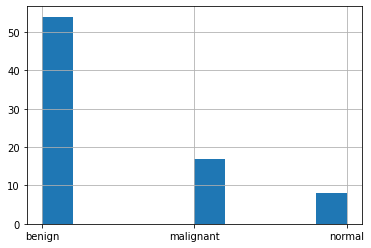

In [54]:
y_i_test.hist()

# Data Preprocessing

In [55]:
# def data_transformation(data):
#     data = data.dropna()
#     if "diagnosis" in data.columns:
#         diagnosis_mapping = {
#             "B": 0,
#             "M": 1
#         }
#         data["diagnosis"] = data["diagnosis"].map(diagnosis_mapping)
#         if "id" in data.columns:
#             data = data.drop("id", axis=1)
    
#     if "class" in data.columns:
#         class_mapping = {
#             "no-recurrence-events'": 0,
#             "recurrence-events'": 1
#         }
#         data["class"] = data["class"].map(class_mapping)
    
#     labels = None
#     if "diagnosis" in data.columns:
#         labels = data["diagnosis"]
#         data = data.drop("diagnosis", axis=1)
#     elif "class" in data.columns:
#         labels = data["class"]
#         data = data.drop("class", axis=1)

# #     # Print the labels to debug
# #     if labels is not None:
# #         print("Labels extracted:\n", labels.head())
# #     else:
# #         print("Labels were not extracted")
    
# #     labels = None
# #     if "diagnosis" in data.columns:
# #         print("Extracting 'diagnosis' labels")
# #         labels = data["diagnosis"]
# #         print("Labels before dropping 'diagnosis' column:\n", labels.head())
# #         data = data.drop("diagnosis", axis=1)
# #     else:
# #         labels = None

# #     if "class" in data.columns:
# #         labels = data["class"]
# #         data = data.drop("class", axis = 1)
# #     else:
# #         labels = None  
    
# #     if labels is not None:
# #         print("Labels extracted:", labels)
# #       else:
# #         print("Labels were not extracted")
#     features = list(data.columns)

#     # missing data use imputer - mean/median
#     from sklearn.impute import SimpleImputer
#     imputer = SimpleImputer(strategy = "median")


#     df_num = data.select_dtypes(include = [np.number])
#     df_num_imp = None
#     if not df_num.empty:
#         df_num_imp = imputer.fit_transform(df_num)

#   # scalling using standarization
#     from sklearn.preprocessing import StandardScaler
#     scalling = StandardScaler()
#     df_num_sc = None
#     if df_num_imp is not None:
#         df_num_sc = scalling.fit_transform(df_num_imp)
        
#   # encoding using oneHotEncoder
#     if "age" in data.columns:
#         category_orders = {
#         'age': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
#         'tumer-size': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'],
#         'inv-nodes': ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26'],
#         'deg-malig': [1, 2, 3]
#         }
#         category_mappings = {key: {label: idx for idx, label in enumerate(values)} for key, values in category_orders.items()}

#         for column, mapping in category_mappings.items():
#             data[column] = data[column].map(mapping)

#         unordered_attributes = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiate']
#         df_unorder = data[unordered_attributes]

#         from sklearn.preprocessing import OneHotEncoder
#         encoder = OneHotEncoder(handle_unknown='ignore')
#         df_unord_enc = encoder.fit_transform(df_unorder)

#         # Print number of features after encoding
#         print("Number of features after encoding:", df_unord_enc.shape[1])
#         new_features = encoder.get_feature_names_out(unordered_attributes)
#         features += new_features.tolist()
#     if "age" in data.columns:
#         for feature in ["age", "menopause", "tumer-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiate"]:
#             if feature in features:
#                 features.remove(feature)
#         # concatenating for categorical data
#         if df_num_sc is not None: 
#             output = np.hstack([df_num_sc, df_unord_enc])
#         else:
#             output = np.hstack([df_unord_enc])
#     else:
#     # concatenating for numerical data
#         if df_num_sc is not None: 
#             output = df_num_sc

#     return output, labels, features

In [56]:
def data_transformation(data):
    data = data.dropna()

    # Handle diagnosis and class mappings
    if "diagnosis" in data.columns:
        diagnosis_mapping = {"B": 0, "M": 1}
        data["diagnosis"] = data["diagnosis"].map(diagnosis_mapping)
        if "id" in data.columns:
            data = data.drop("id", axis=1)

    if "class" in data.columns:
        class_mapping = {"no-recurrence-events'": 0, "recurrence-events'": 1}
        data["class"] = data["class"].map(class_mapping)

    labels = None
    if "diagnosis" in data.columns:
        labels = data["diagnosis"]
        data = data.drop("diagnosis", axis=1)
    elif "class" in data.columns:
        labels = data["class"]
        data = data.drop("class", axis=1)

    features = list(data.columns)

    # Missing data imputation using median
    from sklearn.impute import SimpleImputer

    df_num = data.select_dtypes(include=[np.number])
    
    # Debugging: Print df_num information
    print("Numerical Features:")
    print(df_num.head())
    print("Numerical Features Shape:", df_num.shape)
    print("Numerical Features Dtypes:", df_num.dtypes)

    if not df_num.empty:
        imputer = SimpleImputer(strategy="median")
        df_num_imp = imputer.fit_transform(df_num)
        
        # Scaling using StandardScaler
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        df_num_sc = scaler.fit_transform(df_num_imp)

        # Debugging: Print shapes after transformation
        print("Shape after imputation and scaling:", df_num_sc.shape)

    else:
        df_num_sc = None
        print("No numerical features found after filtering.")

    # Encoding categorical features using OneHotEncoder
    if "age" in data.columns:
        category_orders = {
            'age': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
            'tumer-size': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'],
            'inv-nodes': ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26'],
            'deg-malig': [1, 2, 3]
        }
        category_mappings = {key: {label: idx for idx, label in enumerate(values)} for key, values in category_orders.items()}

        for column, mapping in category_mappings.items():
            data[column] = data[column].map(mapping)

        unordered_attributes = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiate']
        df_unorder = data[unordered_attributes]

        from sklearn.preprocessing import OneHotEncoder
        encoder = OneHotEncoder(handle_unknown='ignore')
        df_unord_enc = encoder.fit_transform(df_unorder)

        # Print number of features after encoding
        print("Number of features after encoding:", df_unord_enc.shape[1])
        new_features = encoder.get_feature_names_out(unordered_attributes)
        features += new_features.tolist()

        # Remove categorical columns from features
        for feature in ["age", "menopause", "tumer-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiate"]:
            if feature in features:
                features.remove(feature)

        # Concatenate numerical and encoded categorical data
        if df_num_sc is not None:
            output = np.hstack([df_num_sc, df_unord_enc.toarray()])  # Convert sparse matrix to dense array
        else:
            output = df_unord_enc.toarray()  # Convert sparse matrix to dense array if necessary

    else:
        # Only numerical data path
        if df_num_sc is not None:
            output = df_num_sc
        else:
            output = None  # Handle this case based on your requirement

    return output, labels, features


## Preprocessing categorical stratified data 

### categorical train data 

In [57]:
c_strat_train_set.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'
6,50-59',ge40',40-44',0-2',no',3',left',left_up',no',no-recurrence-events'


In [58]:
c_train_data, c_train_label, c_train_feature = data_transformation(c_strat_train_set)

Numerical Features:
Empty DataFrame
Columns: []
Index: [0, 1, 3, 4, 6]
Numerical Features Shape: (223, 0)
Numerical Features Dtypes: Series([], dtype: object)
No numerical features found after filtering.
Number of features after encoding: 14


In [59]:
c_train_data

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [60]:
c_train_feature

["menopause_ge40'",
 "menopause_lt40'",
 "menopause_premeno'",
 "node-caps_no'",
 "node-caps_yes'",
 "breast_left'",
 "breast_right'",
 "breast-quad_central'",
 "breast-quad_left_low'",
 "breast-quad_left_up'",
 "breast-quad_right_low'",
 "breast-quad_right_up'",
 "irradiate_no'",
 "irradiate_yes'"]

In [61]:
c_train_label.head()

0    1
1    0
3    0
4    1
6    0
Name: class, dtype: int64

### categorical test data

In [62]:
c_strat_test_set.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
5,50-59',premeno',25-29',3-5',no',2',right',left_up',yes',no-recurrence-events'
15,30-39',premeno',20-24',0-2',no',3',left',central',no',no-recurrence-events'
16,50-59',premeno',10-14',3-5',no',1',right',left_up',no',no-recurrence-events'
20,50-59',lt40',20-24',0-2',NaN,1',left',left_low',no',recurrence-events'


In [63]:
c_test_data, c_test_label, c_test_feature = data_transformation(c_strat_test_set)

Numerical Features:
Empty DataFrame
Columns: []
Index: [2, 5, 15, 16, 25]
Numerical Features Shape: (54, 0)
Numerical Features Dtypes: Series([], dtype: object)
No numerical features found after filtering.
Number of features after encoding: 14


In [64]:
c_test_data

array([[1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1

In [65]:
c_test_feature

["menopause_ge40'",
 "menopause_lt40'",
 "menopause_premeno'",
 "node-caps_no'",
 "node-caps_yes'",
 "breast_left'",
 "breast_right'",
 "breast-quad_central'",
 "breast-quad_left_low'",
 "breast-quad_left_up'",
 "breast-quad_right_low'",
 "breast-quad_right_up'",
 "irradiate_no'",
 "irradiate_yes'"]

In [66]:
c_test_label.head()

2     1
5     0
15    0
16    0
25    0
Name: class, dtype: int64

## Preprocessing numerical stratified data 

### Numerical train data 

In [67]:
n_strat_train_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.30010,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,84300903,M,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.19740,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
5,843786,M,12.45,15.70,82.57,477.1,0.1278,0.1700,0.15780,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
7,84458202,M,13.71,20.83,90.20,577.9,0.1189,0.1645,0.09366,0.05985,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.1273,0.1932,0.18590,0.09353,...,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [68]:
n_train_data, n_train_label, n_train_feature = data_transformation(n_strat_train_set)

Numerical Features:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0           0.1184   
2        19.69         21.25          130.00     1203.0           0.1096   
5        12.45         15.70           82.57      477.1           0.1278   
7        13.71         20.83           90.20      577.9           0.1189   
8        13.00         21.82           87.50      519.8           0.1273   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.2776         0.30010              0.14710         0.2419   
2            0.1599         0.19740              0.12790         0.2069   
5            0.1700         0.15780              0.08089         0.2087   
7            0.1645         0.09366              0.05985         0.2196   
8            0.1932         0.18590              0.09353         0.2350   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_w

In [69]:
n_train_data

array([[ 1.1149717 , -2.08790709,  1.28851774, ...,  2.29187838,
         2.75846523,  1.95997684],
       [ 1.60028204,  0.42180417,  1.58646694, ...,  1.95413675,
         1.15739822,  0.2060424 ],
       [-0.46656904, -0.85960315, -0.37627339, ...,  0.91527967,
         1.76022912,  2.26797937],
       ...,
       [ 2.13412341,  0.68501216,  2.08304893, ...,  1.63147286,
        -1.35925872, -0.71404518],
       [ 1.8600658 ,  2.28734851,  2.00442345, ...,  2.28584728,
         1.92552146,  2.24557919],
       [-1.80545462,  1.18141319, -1.81015389, ..., -1.70975688,
        -0.04502255, -0.75660553]])

In [70]:
n_train_label

0      1
2      1
5      1
7      1
8      1
      ..
562    1
563    1
564    1
567    1
568    0
Name: diagnosis, Length: 456, dtype: int64

In [71]:
n_train_feature

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

### Numerical test data 

In [72]:
n_strat_test_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
14,84667401,M,13.73,22.61,93.60,578.3,0.11310,0.22930,0.2128,0.08025,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310


In [73]:
n_test_data, n_test_label, n_test_feature = data_transformation(n_strat_test_set)

Numerical Features:
    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1         20.57         17.77          132.90     1326.0          0.08474   
3         11.42         20.38           77.58      386.1          0.14250   
4         20.29         14.34          135.10     1297.0          0.10030   
6         18.25         19.98          119.60     1040.0          0.09463   
14        13.73         22.61           93.60      578.3          0.11310   

    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
1            0.07864          0.0869              0.07017         0.1812   
3            0.28390          0.2414              0.10520         0.2597   
4            0.13280          0.1980              0.10430         0.1809   
6            0.10900          0.1127              0.07400         0.1794   
14           0.22930          0.2128              0.08025         0.2069   

    fractal_dimension_mean  ...  radius_worst  texture_worst

In [74]:
n_test_label

1      1
3      1
4      1
6      1
14     1
      ..
535    1
553    0
560    0
565    1
566    1
Name: diagnosis, Length: 113, dtype: int64

In [75]:
n_test_data

array([[ 1.74752549, -0.23850144,  1.60789176, ...,  1.05985685,
        -0.2550669 ,  0.26042234],
       [-0.80292512,  0.39594638, -0.63291614, ...,  2.19922933,
         5.99316898,  4.73092815],
       [ 1.66947891, -1.07227769,  1.69700559, ...,  0.68537778,
        -0.87539073, -0.39114935],
       ...,
       [-0.06984478,  2.04162137, -0.07392935, ..., -0.23408784,
        -1.05859517, -0.04886128],
       [ 1.62488087,  2.30901317,  1.53903107, ...,  0.69015836,
        -0.54112296, -0.94530469],
       [ 0.64093654,  2.26768898,  0.61143705, ...,  0.35551749,
        -1.11002098, -0.31555852]])

In [76]:
n_test_feature

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# Image preprocessing

In [77]:
!pip install keras_preprocessing

In [78]:
from keras_preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

In [79]:
def image_x_transformation(data):
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        rescale=1.0 / 255.0,  # Rescale to [0, 1]
        preprocessing_function=lambda x: cv2.resize(x, (256, 256))  # Resize images
    )
    preprocessed_img = []
    for img in data:
        img_augmented = datagen.random_transform(img)
        preprocessed_img.append(img_augmented)
    
    return np.array(preprocessed_img)


In [80]:
def image_y_transformation(data):
    label_encoder = LabelEncoder()
    
    labels = label_encoder.fit_transform(data)
    
    return labels 

In [81]:
i_train_data= image_x_transformation(x_i_train)
i_test_data = image_x_transformation(x_i_test)

In [82]:
i_train_data

array([[[[134, 134, 134],
         [109, 109, 109],
         [105, 105, 105],
         ...,
         [132, 132, 132],
         [155, 155, 155],
         [126, 126, 126]],

        [[129, 129, 129],
         [124, 124, 124],
         [112, 112, 112],
         ...,
         [160, 160, 160],
         [161, 161, 161],
         [152, 152, 152]],

        [[175, 175, 175],
         [189, 189, 189],
         [202, 202, 202],
         ...,
         [206, 206, 206],
         [195, 195, 195],
         [168, 168, 168]],

        ...,

        [[  6,   6,   6],
         [ 20,  20,  20],
         [  5,   5,   5],
         ...,
         [ 11,  11,  11],
         [ 17,  17,  17],
         [ 11,  11,  11]],

        [[  9,   9,   9],
         [ 14,  14,  14],
         [ 23,  23,  23],
         ...,
         [ 10,  10,  10],
         [ 20,  20,  20],
         [ 12,  12,  12]],

        [[  6,   6,   6],
         [  9,   9,   9],
         [  8,   8,   8],
         ...,
         [  5,   5,   5],
        

In [83]:
i_test_data

array([[[[145, 145, 145],
         [234, 234, 234],
         [220, 220, 220],
         ...,
         [234, 234, 234],
         [232, 232, 232],
         [222, 222, 222]],

        [[102, 102, 102],
         [179, 179, 179],
         [178, 178, 178],
         ...,
         [174, 174, 174],
         [190, 190, 190],
         [185, 185, 185]],

        [[176, 176, 176],
         [218, 218, 218],
         [164, 164, 164],
         ...,
         [193, 193, 193],
         [184, 184, 184],
         [186, 186, 186]],

        ...,

        [[ 22,  22,  22],
         [ 16,  16,  16],
         [ 26,  26,  26],
         ...,
         [ 37,  37,  37],
         [ 28,  28,  28],
         [ 11,  11,  11]],

        [[ 26,  26,  26],
         [ 23,  23,  23],
         [ 22,  22,  22],
         ...,
         [ 56,  56,  56],
         [ 34,  34,  34],
         [ 68,  68,  68]],

        [[ 16,  16,  16],
         [ 16,  16,  16],
         [ 11,  11,  11],
         ...,
         [ 66,  66,  66],
        

In [84]:
i_train_label = image_y_transformation(y_i_train)
i_test_label = image_y_transformation(y_i_test)

In [85]:
i_train_label

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1,

In [86]:
i_test_label

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0])

In [87]:
print(i_train_data.shape)

(316, 64, 64, 3)


# Build Model 

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
def model_fit(model, data, label):
    model.fit(data, label)
    best_model = model.best_estimator_
    print("Best model obtained:", best_model)
    return best_model

In [90]:
def predict_val(best_model,test_data, test_label):
    original_val = test_label
    predicted_val = best_model.predict(test_data)
    predicted_prob = best_model.predict_proba(test_data)[:, 1]
    comparison= pd.DataFrame(data={"Original Value": original_val, "Predicted Value": predicted_val, "Comparison": original_val - predicted_val})
    print(comparison)
    return original_val, predicted_prob, predicted_val

In [91]:
def define_hyperparameter(original_val, predicted_prob, predicted_val):
    # Accuracy
    accuracy = accuracy_score(original_val, predicted_val)
    print(f"Accuracy: {accuracy}")

    # Precision
    precision = precision_score(original_val, predicted_val)
    print(f"Precision (PPV): {precision}")

    # Recall
    recall = recall_score(original_val, predicted_val)
    print(f"Recall (Sensitivity, TPR): {recall}")

    # F1 Score
    f1 = f1_score(original_val, predicted_val)
    print(f"F1 Score: {f1}")

    # AUC
    auc = roc_auc_score(original_val, predicted_prob)
    print(f"AUC: {auc}")

    # Log-loss
    logloss = log_loss(original_val, predicted_prob)
    print(f"Log-loss (Cost/Error): {logloss}")
    from sklearn.metrics import confusion_matrix, classification_report

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(original_val, predicted_val)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Generate classification report
    class_report = classification_report(original_val, predicted_val)
    print("\nClassification Report:")
    print(class_report)
    
def i_define_hyperparameter(original_val, predicted_prob, predicted_val):
    # Accuracy
    accuracy = accuracy_score(original_val, predicted_val)
    print(f"Accuracy: {accuracy}")

    # Precision
    precision = precision_score(original_val, predicted_val, average='weighted')
    print(f"Precision (PPV): {precision}")

    # Recall
    recall = recall_score(original_val, predicted_val, average='weighted')
    print(f"Recall (Sensitivity, TPR): {recall}")

    # F1 Score
    f1 = f1_score(original_val, predicted_val, average='weighted')
    print(f"F1 Score: {f1}")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(original_val, predicted_val)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Generate classification report
    class_report = classification_report(original_val, predicted_val)
    print("\nClassification Report:")
    print(class_report)

## SVC

In [92]:
from sklearn.svm import SVC

In [93]:
svc_param_grid = {
    'C': np.logspace(-3, 3, 7),  # 0.001 to 1000
    'gamma': np.logspace(-4, 2, 7),  # 0.0001 to 100
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

# Initialize the SVC model
svc = SVC(probability=True)

# Initialize GridSearchCV
svc_grid_search = GridSearchCV(
    svc,
    svc_param_grid,
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all available CPU cores
    cv=5  # Number of cross-validation folds
)

### Numerical Dataset 

In [94]:
n_best_model = model_fit(svc_grid_search, n_train_data, n_train_label)

Best model obtained: SVC(C=10.0, gamma=0.01, probability=True)


In [95]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model,n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [96]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9734513274336283
Precision (PPV): 0.9523809523809523
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.963855421686747
AUC: 0.997289972899729
Log-loss (Cost/Error): 0.0629971915490088
Confusion Matrix:
[[70  2]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        41

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



### Categorical Dataset 

In [97]:
c_best_model = model_fit(svc_grid_search, c_train_data, c_train_label)

Best model obtained: SVC(gamma=10.0, probability=True)


In [98]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model,c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [99]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6481481481481481
Precision (PPV): 0.375
Recall (Sensitivity, TPR): 0.17647058823529413
F1 Score: 0.24
AUC: 0.6081081081081081
Log-loss (Cost/Error): 0.6257175499561145
Confusion Matrix:
[[32  5]
 [14  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        37
           1       0.38      0.18      0.24        17

    accuracy                           0.65        54
   macro avg       0.54      0.52      0.51        54
weighted avg       0.59      0.65      0.60        54



### Image Dataset 

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [101]:
i_best_model = model_fit(svc_grid_search, i_train_dataa, i_train_label)

Best model obtained: SVC(C=0.1, gamma=0.0001, probability=True)


In [102]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                0           1
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                0           0
75               1                0           1
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [103]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.759493670886076
Precision (PPV): 0.6069013351829373
Recall (Sensitivity, TPR): 0.759493670886076
F1 Score: 0.6680810468311714
Confusion Matrix:
[[54  0  0]
 [17  0  0]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        54
           1       0.00      0.00      0.00        17
           2       1.00      0.75      0.86         8

    accuracy                           0.76        79
   macro avg       0.58      0.58      0.57        79
weighted avg       0.61      0.76      0.67        79



## Logistic Regression 

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
log_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
}

# Create a logistic regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV
log_grid_search = GridSearchCV(
    logistic_model,
    log_param_grid,
    scoring='accuracy',  # Scoring metric
    cv=5  # Number of cross-validation folds
)


### Numerical Dataset 

In [106]:
n_best_model = model_fit(log_grid_search, n_train_data, n_train_label)

Best model obtained: LogisticRegression(C=1)


In [107]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model,n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [108]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9823008849557522
Precision (PPV): 0.975609756097561
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.975609756097561
AUC: 0.9959349593495935
Log-loss (Cost/Error): 0.057031600224503654
Confusion Matrix:
[[71  1]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        41

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



### Categorical Dataset 

In [109]:
c_best_model = model_fit(log_grid_search, c_train_data, c_train_label)

Best model obtained: LogisticRegression(C=0.1)


In [110]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model,c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                0           0
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [111]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6481481481481481
Precision (PPV): 0.3333333333333333
Recall (Sensitivity, TPR): 0.11764705882352941
F1 Score: 0.17391304347826086
AUC: 0.5699523052464229
Log-loss (Cost/Error): 0.6173297222483837
Confusion Matrix:
[[33  4]
 [15  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        37
           1       0.33      0.12      0.17        17

    accuracy                           0.65        54
   macro avg       0.51      0.50      0.48        54
weighted avg       0.58      0.65      0.59        54



### Image Dataset

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [113]:
i_best_model = model_fit(log_grid_search, i_train_dataa, i_train_label)

Best model obtained: LogisticRegression(C=100)


In [114]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                1          -1
1                1                1           0
2                0                0           0
3                0                2          -2
4                0                1          -1
..             ...              ...         ...
74               0                2          -2
75               1                0           1
76               0                2          -2
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [115]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.43037974683544306
Precision (PPV): 0.5547885658645152
Recall (Sensitivity, TPR): 0.43037974683544306
F1 Score: 0.45341591697646155
Confusion Matrix:
[[22 13 19]
 [10  6  1]
 [ 0  2  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.41      0.51        54
           1       0.29      0.35      0.32        17
           2       0.23      0.75      0.35         8

    accuracy                           0.43        79
   macro avg       0.40      0.50      0.39        79
weighted avg       0.55      0.43      0.45        79



## Naive Bayes 

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
}


# Create a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Initialize GridSearchCV
nb_grid_search = GridSearchCV(
    naive_bayes_model,
    param_grid,
    scoring='accuracy',  # Scoring metric
    cv=5  # Number of cross-validation folds
)


### Numerical Dataset

In [118]:
n_best_model = model_fit(nb_grid_search, n_train_data, n_train_label)

Best model obtained: GaussianNB(priors=[0.1, 0.9])


In [119]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model,n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [120]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9469026548672567
Precision (PPV): 0.9069767441860465
Recall (Sensitivity, TPR): 0.9512195121951219
F1 Score: 0.9285714285714286
AUC: 0.9788279132791329
Log-loss (Cost/Error): 0.920982385204791
Confusion Matrix:
[[68  4]
 [ 2 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        72
           1       0.91      0.95      0.93        41

    accuracy                           0.95       113
   macro avg       0.94      0.95      0.94       113
weighted avg       0.95      0.95      0.95       113



### Categorical Dataset

In [121]:
c_best_model = model_fit(nb_grid_search, c_train_data, c_train_label)

Best model obtained: GaussianNB(priors=[0.9, 0.1], var_smoothing=0.1)


In [122]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model,c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                0           0
15                0                0           0
16                0                0           0
25                0                1          -1
28                0                1          -1
29                1                1           0
35                0                0           0
43                1                1           0
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                1           0
72                0                0           0
82                0                0           0
95                0                1          -1
104               0 

In [123]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6666666666666666
Precision (PPV): 0.46153846153846156
Recall (Sensitivity, TPR): 0.35294117647058826
F1 Score: 0.4
AUC: 0.6128775834658187
Log-loss (Cost/Error): 1.1653715045143351
Confusion Matrix:
[[30  7]
 [11  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        37
           1       0.46      0.35      0.40        17

    accuracy                           0.67        54
   macro avg       0.60      0.58      0.58        54
weighted avg       0.65      0.67      0.65        54



### Image Dataset 

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [125]:
i_best_model = model_fit(nb_grid_search, i_train_dataa, i_train_label)

Best model obtained: GaussianNB(var_smoothing=0.0001)


In [126]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                1          -1
1                1                2          -1
2                0                0           0
3                0                0           0
4                0                2          -2
..             ...              ...         ...
74               0                1          -1
75               1                0           1
76               0                2          -2
77               2                2           0
78               0                2          -2

[79 rows x 3 columns]


In [127]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.3670886075949367
Precision (PPV): 0.5615702852257344
Recall (Sensitivity, TPR): 0.3670886075949367
F1 Score: 0.3875929092995955
Confusion Matrix:
[[18 10 26]
 [ 7  3  7]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.33      0.46        54
           1       0.23      0.18      0.20        17
           2       0.20      1.00      0.33         8

    accuracy                           0.37        79
   macro avg       0.38      0.50      0.33        79
weighted avg       0.56      0.37      0.39        79



## Decision Tree 

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt_param_grid= {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

# Create a Gaussian Naive Bayes model
dt_model = DecisionTreeClassifier()

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(
    dt_model,
    dt_param_grid,
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all available CPU cores
    cv=5  # Number of cross-validation folds
)

### Numerical Dataset 

In [130]:
n_best_model = model_fit(dt_grid_search, n_train_data, n_train_label)

Best model obtained: DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10)


In [131]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model,n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [132]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9646017699115044
Precision (PPV): 0.9302325581395349
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.9523809523809523
AUC: 0.9656165311653117
Log-loss (Cost/Error): 1.302569203006948
Confusion Matrix:
[[69  3]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        41

    accuracy                           0.96       113
   macro avg       0.96      0.97      0.96       113
weighted avg       0.97      0.96      0.96       113



### Categorical Dataset 

In [133]:
c_best_model = model_fit(dt_grid_search, c_train_data, c_train_label)

Best model obtained: DecisionTreeClassifier(max_features='log2')


In [134]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model,c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [135]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6666666666666666
Precision (PPV): 0.4444444444444444
Recall (Sensitivity, TPR): 0.23529411764705882
F1 Score: 0.3076923076923077
AUC: 0.6526232114467408
Log-loss (Cost/Error): 4.425217577133484
Confusion Matrix:
[[32  5]
 [13  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        37
           1       0.44      0.24      0.31        17

    accuracy                           0.67        54
   macro avg       0.58      0.55      0.54        54
weighted avg       0.63      0.67      0.63        54



### Image Dataset 

In [136]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [137]:
i_best_model = model_fit(dt_grid_search, i_train_dataa, i_train_label)

Best model obtained: DecisionTreeClassifier(max_depth=10, min_samples_split=10)


In [138]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                1           0
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                0           0
75               1                1           0
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [139]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.6329113924050633
Precision (PPV): 0.7157840739069513
Recall (Sensitivity, TPR): 0.6329113924050633
F1 Score: 0.6578979093302877
Confusion Matrix:
[[36 16  2]
 [ 4  8  5]
 [ 1  1  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        54
           1       0.32      0.47      0.38        17
           2       0.46      0.75      0.57         8

    accuracy                           0.63        79
   macro avg       0.55      0.63      0.57        79
weighted avg       0.72      0.63      0.66        79



## Random Forest 

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf_param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(
    rf_model,
    rf_param_grid,
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all available CPU cores
    cv=5  # Number of cross-validation folds
)

### Numerical Dataset 

In [142]:
n_best_model = model_fit(rf_grid_search, n_train_data, n_train_label)

Best model obtained: RandomForestClassifier(max_depth=10)


In [143]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model,n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [144]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9557522123893806
Precision (PPV): 0.9090909090909091
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.9411764705882353
AUC: 0.9954268292682927
Log-loss (Cost/Error): 0.09875179904581267
Confusion Matrix:
[[68  4]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        41

    accuracy                           0.96       113
   macro avg       0.95      0.96      0.95       113
weighted avg       0.96      0.96      0.96       113



### Categorical Dataset 

In [145]:
c_best_model = model_fit(rf_grid_search, c_train_data, c_train_label)

Best model obtained: RandomForestClassifier(max_depth=10, n_estimators=50)


In [146]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model,c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [147]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6481481481481481
Precision (PPV): 0.375
Recall (Sensitivity, TPR): 0.17647058823529413
F1 Score: 0.24
AUC: 0.6844197138314786
Log-loss (Cost/Error): 0.7595884878129193
Confusion Matrix:
[[32  5]
 [14  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        37
           1       0.38      0.18      0.24        17

    accuracy                           0.65        54
   macro avg       0.54      0.52      0.51        54
weighted avg       0.59      0.65      0.60        54



### Image Dataset 

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [149]:
i_best_model = model_fit(rf_grid_search, i_train_dataa, i_train_label)

Best model obtained: RandomForestClassifier(max_depth=10, min_samples_split=5)


In [150]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                0           1
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                0           0
75               1                0           1
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [151]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.7721518987341772
Precision (PPV): 0.8291139240506329
Recall (Sensitivity, TPR): 0.7721518987341772
F1 Score: 0.6966043801486839
Confusion Matrix:
[[54  0  0]
 [16  1  0]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        54
           1       1.00      0.06      0.11        17
           2       1.00      0.75      0.86         8

    accuracy                           0.77        79
   macro avg       0.92      0.60      0.61        79
weighted avg       0.83      0.77      0.70        79



## MLP

In [152]:
from sklearn.neural_network import MLPClassifier

In [153]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Hidden layer sizes
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001],  # Regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

mlp = MLPClassifier(max_iter=1000)

mlp_grid_search = GridSearchCV(
    mlp,
    mlp_param_grid,
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all available CPU cores
    cv=5  # Number of cross-validation folds
)


### Numerical Dataset 

In [154]:
n_best_model = model_fit(mlp_grid_search, n_train_data, n_train_label)

Best model obtained: MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate='adaptive', max_iter=1000)


In [155]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model,n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [156]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9823008849557522
Precision (PPV): 0.975609756097561
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.975609756097561
AUC: 0.9969512195121951
Log-loss (Cost/Error): 0.061126011718493405
Confusion Matrix:
[[71  1]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        41

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



### Categorical Dataset

In [157]:
c_best_model = model_fit(mlp_grid_search, c_train_data, c_train_label)

Best model obtained: MLPClassifier(learning_rate='adaptive', max_iter=1000)


In [158]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model,c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                0           0
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                1           0
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                1           0
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [159]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.7222222222222222
Precision (PPV): 0.625
Recall (Sensitivity, TPR): 0.29411764705882354
F1 Score: 0.4
AUC: 0.6542130365659777
Log-loss (Cost/Error): 0.6645597826649022
Confusion Matrix:
[[34  3]
 [12  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        37
           1       0.62      0.29      0.40        17

    accuracy                           0.72        54
   macro avg       0.68      0.61      0.61        54
weighted avg       0.70      0.72      0.69        54



### Image Dataset 

In [160]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [161]:
i_best_model = model_fit(mlp_grid_search, i_train_dataa, i_train_label)

Best model obtained: MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate='adaptive', max_iter=1000)


In [162]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                2          -2
1                1                1           0
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                1          -1
75               1                0           1
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [163]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.569620253164557
Precision (PPV): 0.6645655033396539
Recall (Sensitivity, TPR): 0.569620253164557
F1 Score: 0.5946835920616842
Confusion Matrix:
[[32 14  8]
 [ 5  7  5]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.59      0.69        54
           1       0.33      0.41      0.37        17
           2       0.32      0.75      0.44         8

    accuracy                           0.57        79
   macro avg       0.49      0.58      0.50        79
weighted avg       0.66      0.57      0.59        79



## K-Neighbors 

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

knn_grid_search = GridSearchCV(
    knn,
    knn_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

### Numerical Dataset 

In [166]:
n_best_model = model_fit(knn_grid_search, n_train_data, n_train_label)

Best model obtained: KNeighborsClassifier(metric='manhattan', n_neighbors=3)


In [167]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model, n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [168]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9823008849557522
Precision (PPV): 0.975609756097561
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.975609756097561
AUC: 0.9993224932249323
Log-loss (Cost/Error): 0.026620838880996214
Confusion Matrix:
[[71  1]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        41

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



### Categorical Dataset 

In [169]:
c_best_model = model_fit(knn_grid_search, c_train_data, c_train_label)

Best model obtained: KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')


In [170]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model, c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [171]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6481481481481481
Precision (PPV): 0.375
Recall (Sensitivity, TPR): 0.17647058823529413
F1 Score: 0.24
AUC: 0.6383147853736089
Log-loss (Cost/Error): 4.438706764336417
Confusion Matrix:
[[32  5]
 [14  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        37
           1       0.38      0.18      0.24        17

    accuracy                           0.65        54
   macro avg       0.54      0.52      0.51        54
weighted avg       0.59      0.65      0.60        54



### image Dataset

In [172]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [173]:
i_best_model = model_fit(knn_grid_search, i_train_dataa, i_train_label)

Best model obtained: KNeighborsClassifier(metric='euclidean', n_neighbors=3)


In [174]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                2          -1
2                0                0           0
3                0                0           0
4                0                2          -2
..             ...              ...         ...
74               0                1          -1
75               1                0           1
76               0                0           0
77               2                2           0
78               0                2          -2

[79 rows x 3 columns]


In [175]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.6455696202531646
Precision (PPV): 0.7359023131117098
Recall (Sensitivity, TPR): 0.6455696202531646
F1 Score: 0.6632509207908217
Confusion Matrix:
[[33 11 10]
 [ 5 11  1]
 [ 0  1  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.61      0.72        54
           1       0.48      0.65      0.55        17
           2       0.39      0.88      0.54         8

    accuracy                           0.65        79
   macro avg       0.58      0.71      0.60        79
weighted avg       0.74      0.65      0.66        79



## ADABoost 

In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [177]:
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

ada = AdaBoostClassifier()

ada_grid_search = GridSearchCV(
    ada,
    ada_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

### Numerical Dataset 

In [178]:
n_best_model = model_fit(ada_grid_search, n_train_data, n_train_label)

Best model obtained: AdaBoostClassifier(learning_rate=1, n_estimators=200)


In [179]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model, n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [180]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9734513274336283
Precision (PPV): 0.9523809523809523
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.963855421686747
AUC: 0.9918699186991871
Log-loss (Cost/Error): 0.5010486367784851
Confusion Matrix:
[[70  2]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        41

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



### Categorical Dataset 

In [181]:
c_best_model = model_fit(ada_grid_search, c_train_data, c_train_label)

Best model obtained: AdaBoostClassifier(learning_rate=0.01, n_estimators=200)


In [182]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model, c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                0           0
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [183]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6481481481481481
Precision (PPV): 0.3333333333333333
Recall (Sensitivity, TPR): 0.11764705882352941
F1 Score: 0.17391304347826086
AUC: 0.6136724960254372
Log-loss (Cost/Error): 0.6201422754099342
Confusion Matrix:
[[33  4]
 [15  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        37
           1       0.33      0.12      0.17        17

    accuracy                           0.65        54
   macro avg       0.51      0.50      0.48        54
weighted avg       0.58      0.65      0.59        54



### Image Dataset 

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [185]:
i_best_model = model_fit(ada_grid_search, i_train_dataa, i_train_label)

Best model obtained: AdaBoostClassifier(learning_rate=1, n_estimators=200)


In [186]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                0           1
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                0           0
75               1                0           1
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [187]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.7341772151898734
Precision (PPV): 0.6972492697176241
Recall (Sensitivity, TPR): 0.7341772151898734
F1 Score: 0.701363684714392
Confusion Matrix:
[[49  5  0]
 [14  3  0]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        54
           1       0.38      0.18      0.24        17
           2       1.00      0.75      0.86         8

    accuracy                           0.73        79
   macro avg       0.71      0.61      0.64        79
weighted avg       0.70      0.73      0.70        79



## Gradient Boosting

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

In [189]:
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingClassifier()

gb_grid_search = GridSearchCV(
    gb,
    gb_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

### Numerical Dataset 

In [190]:
n_best_model = model_fit(gb_grid_search, n_train_data, n_train_label)

Best model obtained: GradientBoostingClassifier(n_estimators=200)


In [191]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model, n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [192]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9734513274336283
Precision (PPV): 0.9523809523809523
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.963855421686747
AUC: 0.9949186991869918
Log-loss (Cost/Error): 0.15612181008259726
Confusion Matrix:
[[70  2]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        41

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



### Categorical Dataset 

In [193]:
c_best_model = model_fit(gb_grid_search, c_train_data, c_train_label)

Best model obtained: GradientBoostingClassifier(learning_rate=1, n_estimators=200)


In [194]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model, c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [195]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6666666666666666
Precision (PPV): 0.4444444444444444
Recall (Sensitivity, TPR): 0.23529411764705882
F1 Score: 0.3076923076923077
AUC: 0.6526232114467407
Log-loss (Cost/Error): 1.3737591483110687
Confusion Matrix:
[[32  5]
 [13  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        37
           1       0.44      0.24      0.31        17

    accuracy                           0.67        54
   macro avg       0.58      0.55      0.54        54
weighted avg       0.63      0.67      0.63        54



### Image Dataset 

In [196]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [197]:
i_best_model = model_fit(gb_grid_search, i_train_dataa, i_train_label)

Best model obtained: GradientBoostingClassifier(learning_rate=1, max_depth=7, n_estimators=200)


In [198]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                0           1
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                2          -2
75               1                0           1
76               0                2          -2
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [199]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.6962025316455697
Precision (PPV): 0.7337744533947066
Recall (Sensitivity, TPR): 0.6962025316455697
F1 Score: 0.6932342352804551
Confusion Matrix:
[[43  2  9]
 [10  6  1]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        54
           1       0.75      0.35      0.48        17
           2       0.38      0.75      0.50         8

    accuracy                           0.70        79
   macro avg       0.64      0.63      0.59        79
weighted avg       0.73      0.70      0.69        79



## Histogram Gradient Boosting 

In [200]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [201]:
hgb_param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 3, 5, 7]
}

hgb = HistGradientBoostingClassifier()

hgb_grid_search = GridSearchCV(
    hgb,
    hgb_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)


### Numerical Dataset 

In [202]:
n_best_model = model_fit(hgb_grid_search, n_train_data, n_train_label)

Best model obtained: HistGradientBoostingClassifier(max_depth=5, max_iter=300)


In [203]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model, n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [204]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9911504424778761
Precision (PPV): 1.0
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.9876543209876543
AUC: 0.9966124661246614
Log-loss (Cost/Error): 0.09656883062902674
Confusion Matrix:
[[72  0]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        41

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



### Categorical Dataset 

In [205]:
c_best_model = model_fit(hgb_grid_search, c_train_data, c_train_label)

Best model obtained: HistGradientBoostingClassifier(learning_rate=1, max_iter=200)


In [206]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model, c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                1           0
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                1           0
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [207]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.7407407407407407
Precision (PPV): 0.6153846153846154
Recall (Sensitivity, TPR): 0.47058823529411764
F1 Score: 0.5333333333333333
AUC: 0.6383147853736089
Log-loss (Cost/Error): 0.8542659604059524
Confusion Matrix:
[[32  5]
 [ 9  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        37
           1       0.62      0.47      0.53        17

    accuracy                           0.74        54
   macro avg       0.70      0.67      0.68        54
weighted avg       0.73      0.74      0.73        54



### Image Dataset 

In [208]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [209]:
i_best_model = model_fit(hgb_grid_search, i_train_dataa, i_train_label)

Best model obtained: HistGradientBoostingClassifier(max_depth=5, max_iter=300)


In [210]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                1           0
2                0                0           0
3                0                1          -1
4                0                0           0
..             ...              ...         ...
74               0                0           0
75               1                0           1
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [211]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.6582278481012658
Precision (PPV): 0.6645569620253164
Recall (Sensitivity, TPR): 0.6582278481012658
F1 Score: 0.659411474601348
Confusion Matrix:
[[42 12  0]
 [13  4  0]
 [ 1  1  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        54
           1       0.24      0.24      0.24        17
           2       1.00      0.75      0.86         8

    accuracy                           0.66        79
   macro avg       0.66      0.59      0.62        79
weighted avg       0.66      0.66      0.66        79



## Bagging 

In [212]:
from sklearn.ensemble import BaggingClassifier

In [213]:
bag_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0]
}

bag = BaggingClassifier()

bag_grid_search = GridSearchCV(
    bag,
    bag_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

### Numerical Dataset

In [214]:
n_best_model = model_fit(bag_grid_search, n_train_data, n_train_label)

Best model obtained: BaggingClassifier(max_samples=0.5, n_estimators=100)


In [215]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model, n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [216]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9646017699115044
Precision (PPV): 0.9302325581395349
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.9523809523809523
AUC: 0.9883130081300813
Log-loss (Cost/Error): 0.12010435407972689
Confusion Matrix:
[[69  3]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        41

    accuracy                           0.96       113
   macro avg       0.96      0.97      0.96       113
weighted avg       0.97      0.96      0.96       113



### Categorical Dataset 

In [217]:
c_best_model = model_fit(bag_grid_search, c_train_data, c_train_label)

Best model obtained: BaggingClassifier(max_features=0.75, n_estimators=50)


In [218]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model, c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [219]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6851851851851852
Precision (PPV): 0.5
Recall (Sensitivity, TPR): 0.29411764705882354
F1 Score: 0.37037037037037035
AUC: 0.6558028616852146
Log-loss (Cost/Error): 0.7058422888131264
Confusion Matrix:
[[32  5]
 [12  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.50      0.29      0.37        17

    accuracy                           0.69        54
   macro avg       0.61      0.58      0.58        54
weighted avg       0.66      0.69      0.66        54



### Image Dataset

In [220]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [221]:
i_best_model = model_fit(bag_grid_search, i_train_dataa, i_train_label)

Best model obtained: BaggingClassifier(max_features=0.75)


In [222]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                0           1
2                0                1          -1
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                0           0
75               1                1           0
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [223]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.6455696202531646
Precision (PPV): 0.6438888225459756
Recall (Sensitivity, TPR): 0.6455696202531646
F1 Score: 0.6437807627917648
Confusion Matrix:
[[40 11  3]
 [11  5  1]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        54
           1       0.31      0.29      0.30        17
           2       0.60      0.75      0.67         8

    accuracy                           0.65        79
   macro avg       0.56      0.59      0.57        79
weighted avg       0.64      0.65      0.64        79



## Extra Tree 

In [224]:
from sklearn.ensemble import ExtraTreesClassifier

In [225]:
et_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

et = ExtraTreesClassifier()

et_grid_search = GridSearchCV(
    et,
    et_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

### Numerical Dataset 

In [226]:
n_best_model = model_fit(et_grid_search, n_train_data, n_train_label)

Best model obtained: ExtraTreesClassifier(max_depth=20, min_samples_split=5, n_estimators=50)


In [227]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model, n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [228]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9734513274336283
Precision (PPV): 0.9523809523809523
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.963855421686747
AUC: 0.9959349593495934
Log-loss (Cost/Error): 0.09180009736423152
Confusion Matrix:
[[70  2]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        41

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



### Categorical Dataset 

In [229]:
c_best_model = model_fit(et_grid_search, c_train_data, c_train_label)

Best model obtained: ExtraTreesClassifier(max_depth=20, n_estimators=50)


In [230]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model, c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [231]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6481481481481481
Precision (PPV): 0.375
Recall (Sensitivity, TPR): 0.17647058823529413
F1 Score: 0.24
AUC: 0.6478537360890302
Log-loss (Cost/Error): 4.441504183777029
Confusion Matrix:
[[32  5]
 [14  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        37
           1       0.38      0.18      0.24        17

    accuracy                           0.65        54
   macro avg       0.54      0.52      0.51        54
weighted avg       0.59      0.65      0.60        54



### Image Dataset 

In [232]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [233]:
i_best_model = model_fit(et_grid_search, i_train_dataa, i_train_label)

Best model obtained: ExtraTreesClassifier(max_depth=30, n_estimators=50)


In [234]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                0           1
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                0           0
75               1                0           1
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [235]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.759493670886076
Precision (PPV): 0.6069013351829373
Recall (Sensitivity, TPR): 0.759493670886076
F1 Score: 0.6680810468311714
Confusion Matrix:
[[54  0  0]
 [17  0  0]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        54
           1       0.00      0.00      0.00        17
           2       1.00      0.75      0.86         8

    accuracy                           0.76        79
   macro avg       0.58      0.58      0.57        79
weighted avg       0.61      0.76      0.67        79



## Stacking 

In [236]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [237]:
# Define your base estimators
base_estimators = [
    ('knn', KNeighborsClassifier()),
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier())
]

# Define the meta-estimator (the final classifier that combines the base models)
meta_estimator = RandomForestClassifier()

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_estimator,
    stack_method='auto',  # 'auto' selects the best method automatically
    cv=5,  # Cross-validation folds for stacking
    n_jobs=-1
)

# Parameter grid for grid search
stacking_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'ada__n_estimators': [50, 100],
    'gb__learning_rate': [0.1, 0.5],
    'final_estimator__n_estimators': [50, 100],
    'final_estimator__max_depth': [3, 5, 7]
}

# Perform grid search
stacking_grid_search = GridSearchCV(
    stacking_clf,
    stacking_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

### Numerical Dataset 

In [238]:
n_best_model = model_fit(stacking_grid_search, n_train_data, n_train_label)

Best model obtained: StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('ada', AdaBoostClassifier(n_estimators=100)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=RandomForestClassifier(max_depth=3),
                   n_jobs=-1)


In [239]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model, n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [240]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9646017699115044
Precision (PPV): 0.9302325581395349
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.9523809523809523
AUC: 0.9937330623306233
Log-loss (Cost/Error): 0.07689299498842549
Confusion Matrix:
[[69  3]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        41

    accuracy                           0.96       113
   macro avg       0.96      0.97      0.96       113
weighted avg       0.97      0.96      0.96       113



### Categorical Dataset 

In [241]:
c_best_model = model_fit(stacking_grid_search, c_train_data, c_train_label)

Best model obtained: StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.5))],
                   final_estimator=RandomForestClassifier(max_depth=3,
                                                          n_estimators=50),
                   n_jobs=-1)


In [242]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model, c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                0           0
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [243]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6666666666666666
Precision (PPV): 0.4
Recall (Sensitivity, TPR): 0.11764705882352941
F1 Score: 0.18181818181818182
AUC: 0.6160572337042926
Log-loss (Cost/Error): 0.6345286705016702
Confusion Matrix:
[[34  3]
 [15  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        37
           1       0.40      0.12      0.18        17

    accuracy                           0.67        54
   macro avg       0.55      0.52      0.49        54
weighted avg       0.60      0.67      0.60        54



### Image Dataset 

In [244]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [245]:
i_best_model = model_fit(stacking_grid_search, i_train_dataa, i_train_label)

Best model obtained: StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('ada', AdaBoostClassifier(n_estimators=100)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.5))],
                   final_estimator=RandomForestClassifier(max_depth=3,
                                                          n_estimators=50),
                   n_jobs=-1)


In [246]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                0           1
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                0           0
75               1                0           1
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [247]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.7974683544303798
Precision (PPV): 0.789425105485232
Recall (Sensitivity, TPR): 0.7974683544303798
F1 Score: 0.7769780101897673
Confusion Matrix:
[[51  3  0]
 [11  6  0]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        54
           1       0.67      0.35      0.46        17
           2       1.00      0.75      0.86         8

    accuracy                           0.80        79
   macro avg       0.82      0.68      0.73        79
weighted avg       0.79      0.80      0.78        79



## Voting 

In [248]:
from sklearn.ensemble import VotingClassifier

In [249]:
voting_clf = VotingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier()),
        ('ada', AdaBoostClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'
)

# For VotingClassifier, you can set parameters of individual classifiers or the voting classifier itself
voting_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'ada__n_estimators': [50, 100],
    'gb__learning_rate': [0.1, 0.5]
}

voting_grid_search = GridSearchCV(
    voting_clf,
    voting_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)


### Numerical Dataset

In [250]:
n_best_model = model_fit(voting_grid_search, n_train_data, n_train_label)

Best model obtained: VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('ada', AdaBoostClassifier(n_estimators=100)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.5))],
                 voting='soft')


In [251]:
n_original_val, n_predicted_prob, n_predicted_val = predict_val(n_best_model, n_test_data, n_test_label)

     Original Value  Predicted Value  Comparison
1                 1                1           0
3                 1                1           0
4                 1                1           0
6                 1                1           0
14                1                1           0
..              ...              ...         ...
535               1                1           0
553               0                0           0
560               0                0           0
565               1                1           0
566               1                1           0

[113 rows x 3 columns]


In [252]:
define_hyperparameter(n_original_val, n_predicted_prob, n_predicted_val)

Accuracy: 0.9823008849557522
Precision (PPV): 0.975609756097561
Recall (Sensitivity, TPR): 0.975609756097561
F1 Score: 0.975609756097561
AUC: 0.9983062330623307
Log-loss (Cost/Error): 0.161270531803842
Confusion Matrix:
[[71  1]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        41

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



### Categorical Dataset 

In [253]:
c_best_model = model_fit(voting_grid_search, c_train_data, c_train_label)

Best model obtained: VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('ada', AdaBoostClassifier()),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.5))],
                 voting='soft')


In [254]:
c_original_val, c_predicted_prob, c_predicted_val = predict_val(c_best_model, c_test_data, c_test_label)

     Original Value  Predicted Value  Comparison
2                 1                0           1
5                 0                1          -1
15                0                0           0
16                0                0           0
25                0                0           0
28                0                0           0
29                1                0           1
35                0                0           0
43                1                0           1
46                0                0           0
49                0                0           0
51                0                0           0
52                0                0           0
59                1                0           1
60                1                1           0
63                1                0           1
72                0                0           0
82                0                0           0
95                0                0           0
104               0 

In [255]:
define_hyperparameter(c_original_val, c_predicted_prob, c_predicted_val)

Accuracy: 0.6481481481481481
Precision (PPV): 0.375
Recall (Sensitivity, TPR): 0.17647058823529413
F1 Score: 0.24
AUC: 0.6462639109697933
Log-loss (Cost/Error): 0.6197841081113018
Confusion Matrix:
[[32  5]
 [14  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        37
           1       0.38      0.18      0.24        17

    accuracy                           0.65        54
   macro avg       0.54      0.52      0.51        54
weighted avg       0.59      0.65      0.60        54



### Image Dataset 

In [256]:
from sklearn.decomposition import PCA
pca = PCA(n_components=316)
i_train_dataa = i_train_data.reshape(len(i_train_data), -1)
i_train_dataa = pca.fit_transform(i_train_dataa)
i_test_dataa = i_test_data.reshape(len(i_test_data), -1)
i_test_dataa = pca.transform(i_test_dataa)

In [257]:
i_best_model = model_fit(voting_grid_search, i_train_dataa, i_train_label)

Best model obtained: VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('ada', AdaBoostClassifier(n_estimators=100)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.5))],
                 voting='soft')


In [258]:
i_original_val, i_predicted_prob, i_predicted_val = predict_val(i_best_model,i_test_dataa, i_test_label)

    Original Value  Predicted Value  Comparison
0                0                0           0
1                1                0           1
2                0                0           0
3                0                0           0
4                0                0           0
..             ...              ...         ...
74               0                1          -1
75               1                0           1
76               0                0           0
77               2                2           0
78               0                0           0

[79 rows x 3 columns]


In [259]:
i_define_hyperparameter(i_original_val, i_predicted_prob, i_predicted_val)

Accuracy: 0.7974683544303798
Precision (PPV): 0.7919182083739046
Recall (Sensitivity, TPR): 0.7974683544303798
F1 Score: 0.7891754703213729
Confusion Matrix:
[[49  5  0]
 [ 9  8  0]
 [ 2  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        54
           1       0.62      0.47      0.53        17
           2       1.00      0.75      0.86         8

    accuracy                           0.80        79
   macro avg       0.81      0.71      0.75        79
weighted avg       0.79      0.80      0.79        79

